In [2]:
# Thư viện xử lý với mảng
import numpy as np
import pandas as pd

# Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

# Thư viện tiền xử lý dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.preprocessing import StandardScaler

# Thư viện các mô hình Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# Thư viện các mô hình Deep learning
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense

# Thư viện đánh gái hiệu quả của các mô hình học máy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

# Đọc dữ liệu

In [3]:
df = pd.read_csv('hotel_booking_cleaned.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month_name,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,arrival_date_month_number,id_reservation_status_date,arrival_date_full,id_arrival_date,arrival_date_quarter,arrival_date_day_of_week,arrival_date_day_name,arrival_date_day_name_abbrev,arrival_date_month_name_abbrev,arrival_date_weekday_flag
50836,City Hotel,1,16,2016,May,23,29,1,0,2,...,5,20160513,5/29/2016,20160529,2,6,Sunday,Sun,May,1
10050,Resort Hotel,1,8,2017,March,9,3,1,2,2,...,3,20170303,3/3/2017,20170303,1,4,Friday,Fri,Mar,0
63223,City Hotel,1,608,2017,March,10,9,0,1,1,...,3,20151021,3/9/2017,20170309,1,3,Thursday,Thu,Mar,0
109406,City Hotel,0,14,2017,April,17,25,0,4,2,...,4,20170429,4/25/2017,20170425,2,1,Tuesday,Tue,Apr,0
71582,City Hotel,1,98,2017,August,31,5,2,1,2,...,8,20170524,8/5/2017,20170805,3,5,Saturday,Sat,Aug,0


# Khảo sát dữ liệu

In [4]:
# khong lay cac cot ngay thang nam vao thuc hien du doan nhan 0, 1
drop_column = ['is_canceled','arrival_date_year','arrival_date_month_name','arrival_date_week_number','arrival_date_day_of_month','country','reservation_status_date','name','email','phone-number','arrival_date_month_number','id_reservation_status_date','arrival_date_full','id_arrival_date','arrival_date_quarter','arrival_date_day_of_week','arrival_date_day_name','arrival_date_day_name_abbrev','arrival_date_month_name_abbrev','arrival_date_weekday_flag']
X = df.drop(drop_column, axis = 1)

In [5]:
X.sample(5)

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30089,Resort Hotel,26,1,4,2,0,0,1,Online TA,TA/TO,...,1,1,0,No Deposit,0,Transient,38.62,0,1,Check-Out
97095,City Hotel,50,2,5,2,0,0,1,Direct,Direct,...,1,2,1,No Deposit,0,Transient-Party,96.90,0,0,Check-Out
1748,Resort Hotel,121,2,4,2,0,0,1,Online TA,TA/TO,...,1,1,0,No Deposit,0,Transient,82.00,0,2,Canceled
110112,City Hotel,15,2,1,2,1,0,1,Direct,Direct,...,6,6,0,No Deposit,0,Transient,189.00,0,2,Check-Out
736,Resort Hotel,30,1,3,2,0,0,1,Online TA,TA/TO,...,1,4,0,No Deposit,0,Transient,134.00,0,1,Check-Out


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118216 entries, 0 to 118215
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118216 non-null  object 
 1   lead_time                       118216 non-null  int64  
 2   stays_in_weekend_nights         118216 non-null  int64  
 3   stays_in_week_nights            118216 non-null  int64  
 4   adults                          118216 non-null  int64  
 5   children                        118216 non-null  int64  
 6   babies                          118216 non-null  int64  
 7   meal                            118216 non-null  int64  
 8   market_segment                  118216 non-null  object 
 9   distribution_channel            118216 non-null  object 
 10  is_repeated_guest               118216 non-null  int64  
 11  previous_cancellations          118216 non-null  int64  
 12  previous_booking

In [7]:
y = pd.DataFrame(df['is_canceled'])

In [8]:
y_ratio_sales = y.value_counts()

([0, 1], [Text(0, 0, 'Uncanceled'), Text(1, 0, 'Canceled')])

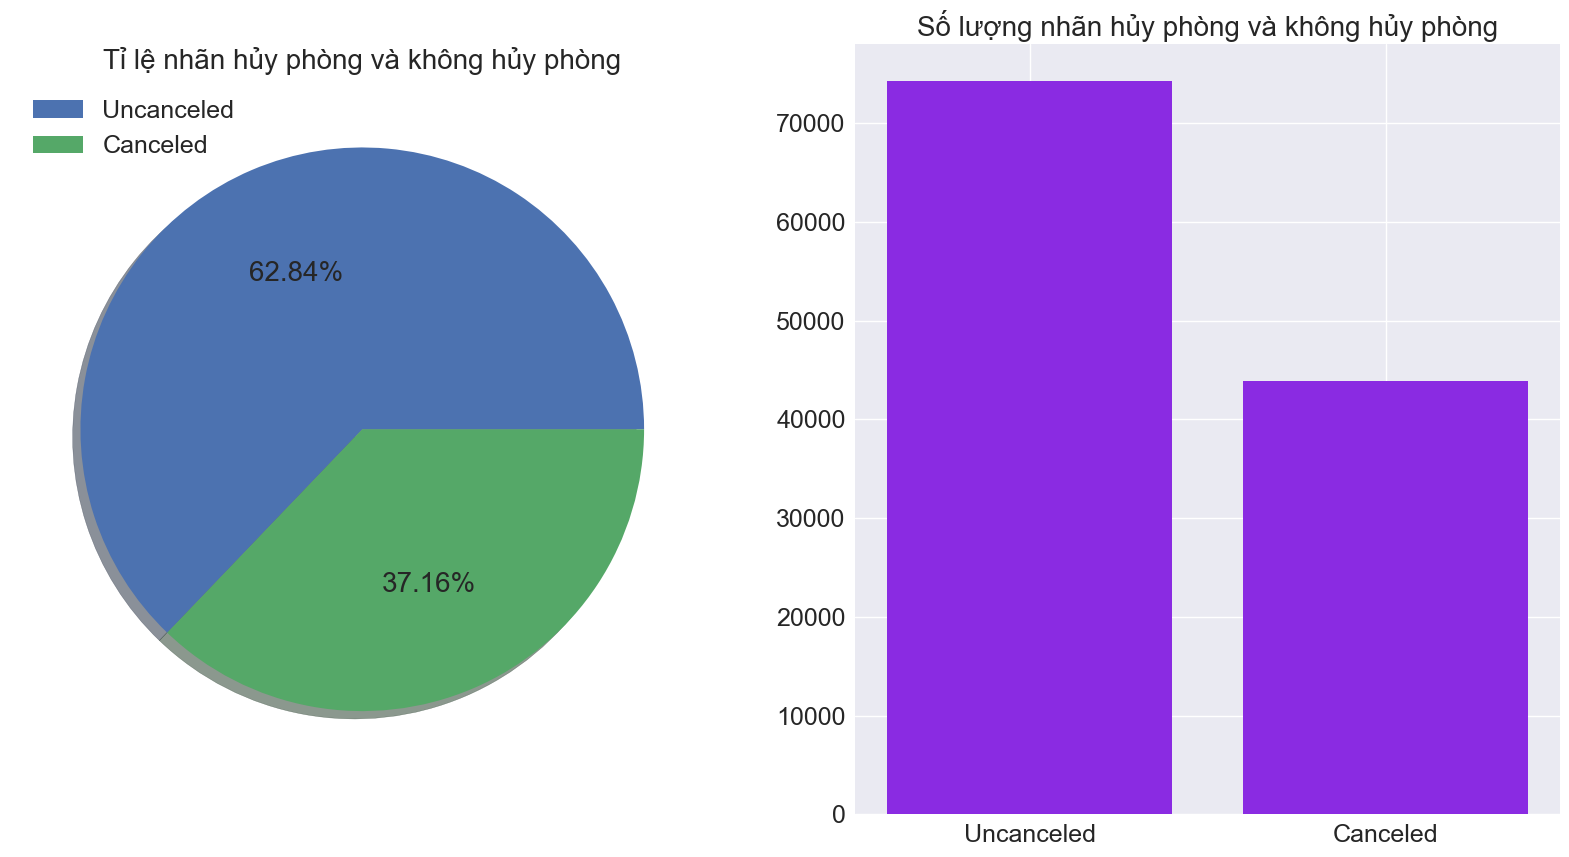

In [9]:
fig,((ax1,ax2)) = plt.subplots(figsize=(20,10),ncols=2,nrows=1)

label_IsCanceled = ['Uncanceled','Canceled']
textprops = {"fontsize":20}

ax1.pie(y_ratio_sales, autopct='%1.2f%%', shadow = True, textprops = textprops)
ax1.set_title('Tỉ lệ nhãn hủy phòng và không hủy phòng',fontsize = 20)
ax1.legend(label_IsCanceled,title = "",loc='upper left',fontsize=18);

ax2.bar(["Uncanceled","Canceled"], y_ratio_sales.values, color='blueviolet');
ax2.set_title('Số lượng nhãn hủy phòng và không hủy phòng',fontsize = 20)
plt.yticks(size=18)
plt.xticks(size=18)

# Tiền xử lý dữ liệu

## Kiểm tra và xử lý dữ liệu biến rời rạc

In [10]:
# Xử lý cho biến rời rạc
df['hotel'].value_counts()
hotel_type = {'City Hotel': 0, 'Resort Hotel':1}
for i in [X]:
  i['hotel'] = i['hotel'].map(hotel_type)

df['market_segment'].value_counts()
mar_type = {'Online TA': 0, 'Offline TA/TO':1, 'Groups':2, 'Direct':3, 'Corporate':4, 'Complementary':5, 'Aviation':6}
for i in [X]:
   i['market_segment'] = i['market_segment'].map(mar_type)

df['distribution_channel'].value_counts()
dis_type = {'TA/TO': 0, 'Direct':1, 'Corporate':2, 'GDS':3}
for i in [X]:
    i['distribution_channel'] = i['distribution_channel'].map(dis_type)

df['deposit_type'].value_counts()
des_type = {'No Deposit': 0, 'Non Refund':1, 'Refundable':2}
for i in [X]:
    i['deposit_type'] = i['deposit_type'].map(des_type)

df['customer_type'].value_counts()
cus_type = {'Transient': 0, 'Transient-Party':1, 'Contract':2, 'Group':3}
for i in [X]:
    i['customer_type'] = i['customer_type'].map(cus_type)

df['reservation_status'].value_counts()
res_type = {'Check-Out': 0, 'Canceled':1, 'No-Show':2}
for i in [X]:
    i['reservation_status'] = i['reservation_status'].map(res_type)

<Axes: xlabel='deposit_type'>

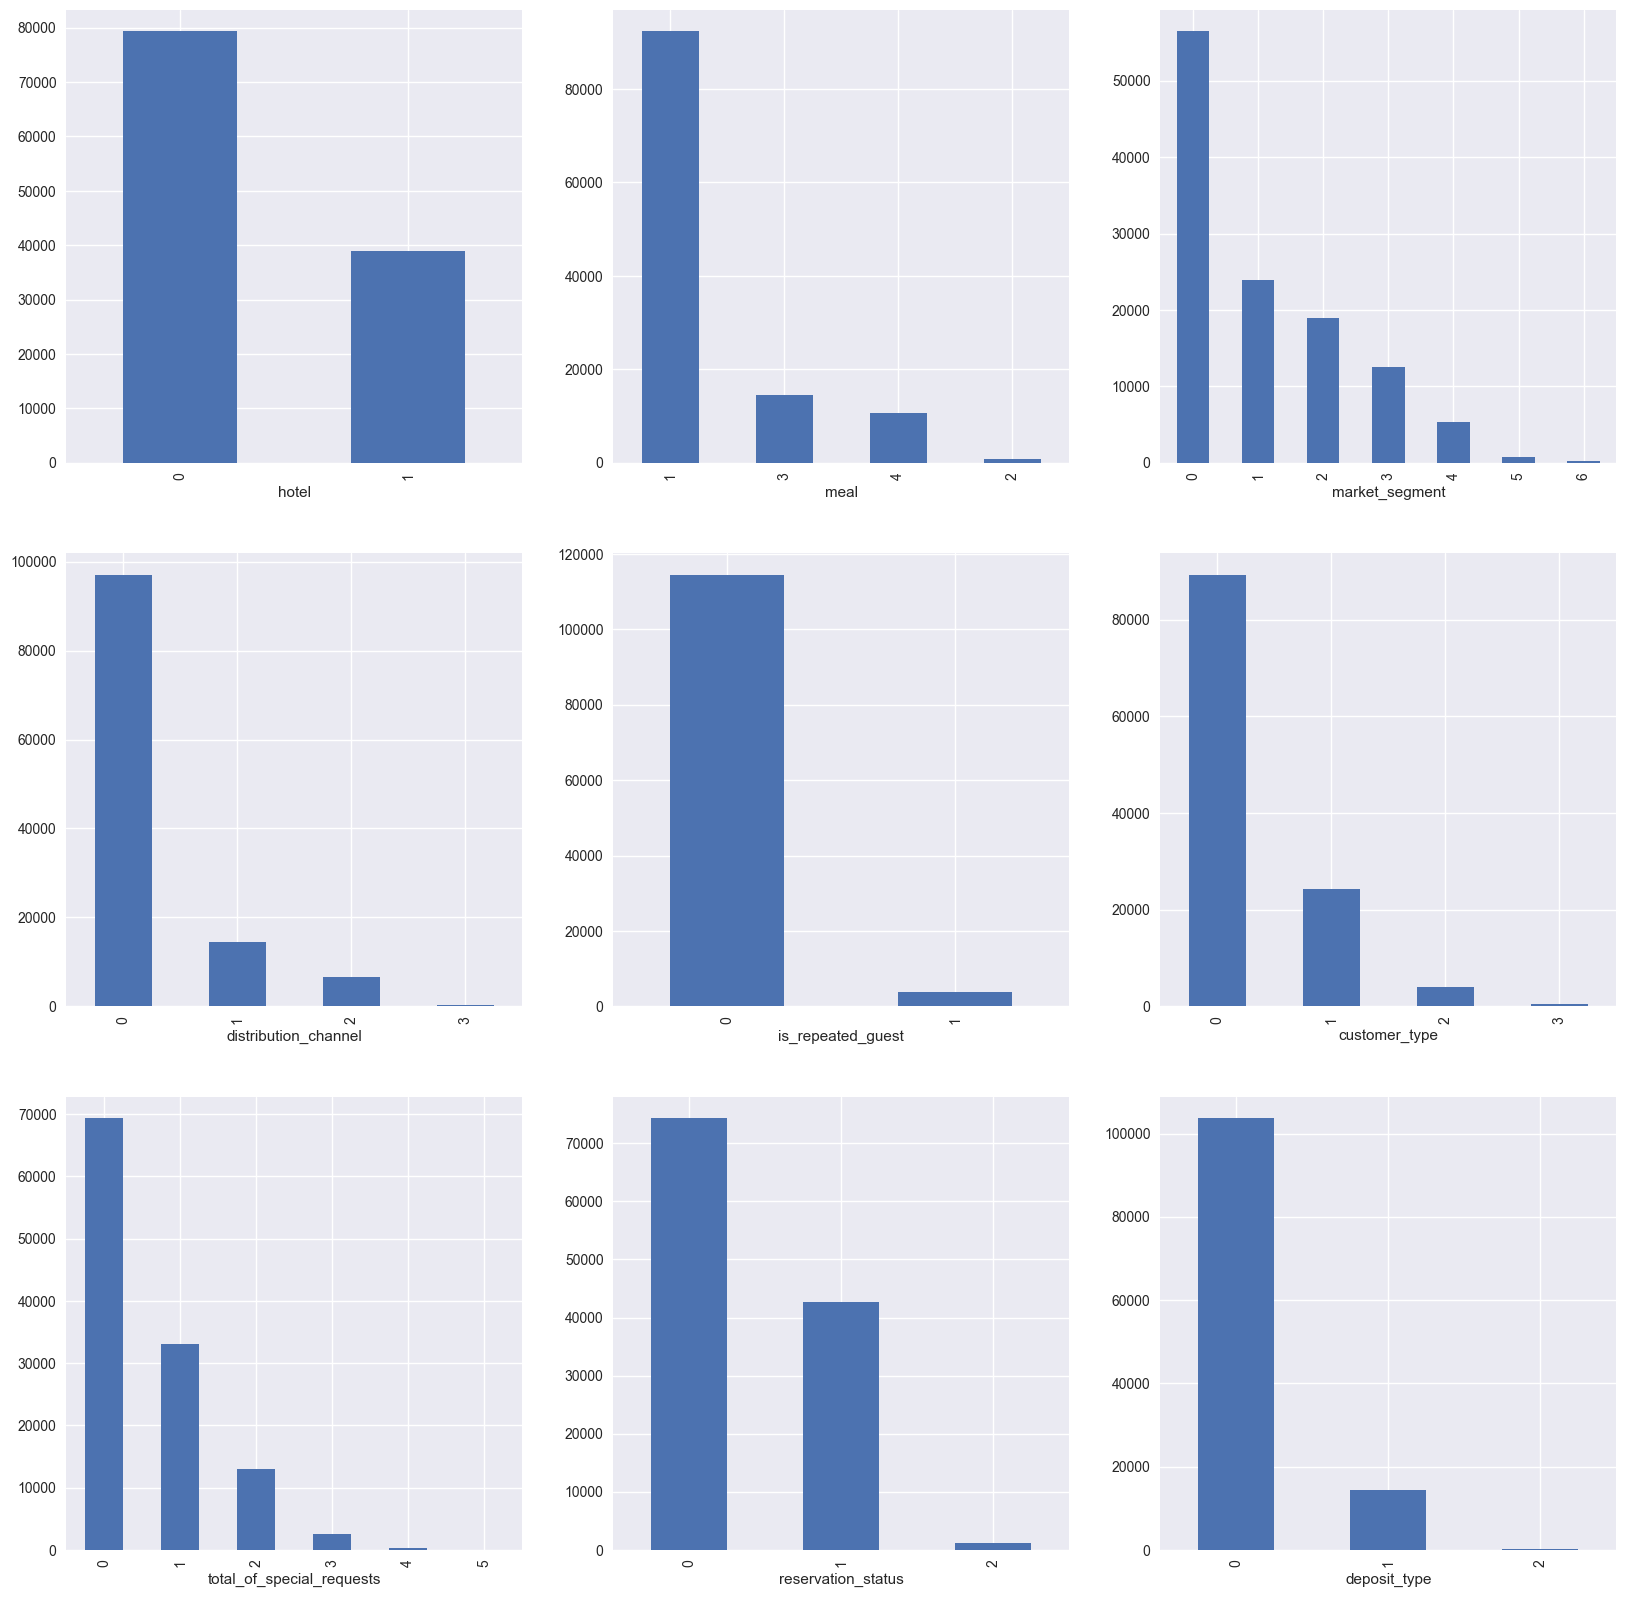

In [11]:
fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows=3)
textprops = {"fontsize":20}

X['hotel'].value_counts().plot(kind='bar',ax=ax[0,0])
X['meal'].value_counts().plot(kind='bar',ax=ax[0,1])
X['market_segment'].value_counts().plot(kind='bar',ax=ax[0,2])

X['distribution_channel'].value_counts().plot(kind='bar',ax=ax[1,0])
X['is_repeated_guest'].value_counts().plot(kind='bar',ax=ax[1,1])
X['customer_type'].value_counts().plot(kind='bar',ax=ax[1,2])

X['total_of_special_requests'].value_counts().plot(kind='bar',ax=ax[2,0])
X['reservation_status'].value_counts().plot(kind='bar',ax=ax[2,1])
X['deposit_type'].value_counts().plot(kind='bar',ax=ax[2,2])

## Kiểm tra và xử lý các dữ liệu nhiễu (outliers) của biến liên tục

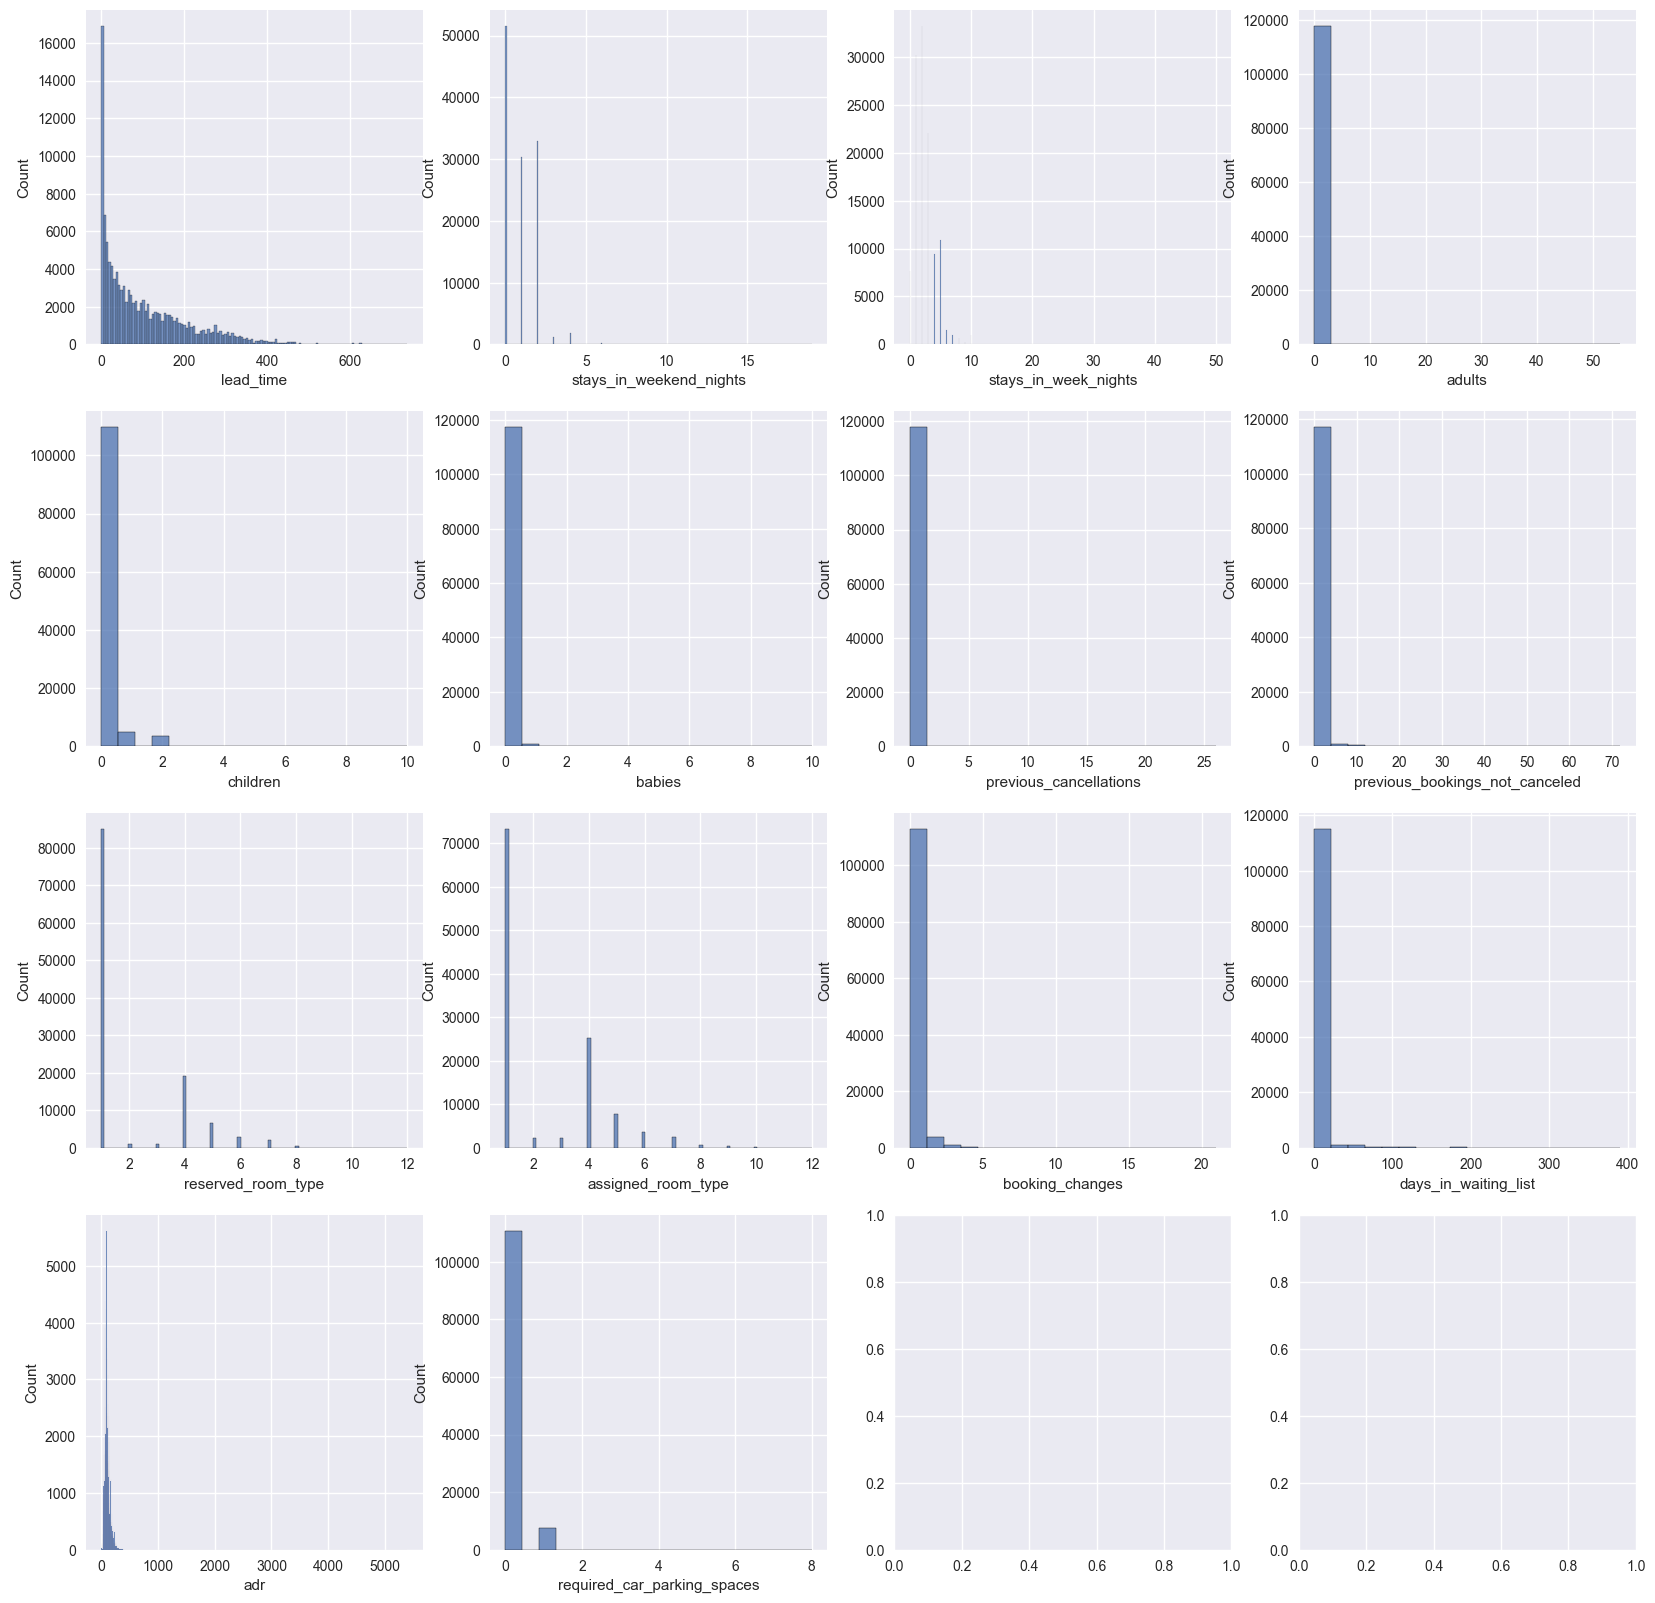

In [12]:
fig, ax = plt.subplots(figsize=(20,20), ncols=4, nrows=4)
textprops = {"fontsize":20}

sns.histplot(x = X['lead_time'],ax=ax[0,0])
sns.histplot(x = X['stays_in_weekend_nights'],ax=ax[0,1])
sns.histplot(x = X['stays_in_week_nights'],ax=ax[0,2])
sns.histplot(x = X['adults'],ax=ax[0,3])

sns.histplot(x = X['children'],ax=ax[1,0])
sns.histplot(x = X['babies'],ax=ax[1,1])
sns.histplot(x = X['previous_cancellations'],ax=ax[1,2])
sns.histplot(x = X['previous_bookings_not_canceled'],ax=ax[1,3])

sns.histplot(x = X['reserved_room_type'],ax=ax[2,0])
sns.histplot(x = X['assigned_room_type'],ax=ax[2,1])
sns.histplot(x = X['booking_changes'],ax=ax[2,2])
sns.histplot(x = X['days_in_waiting_list'],ax=ax[2,3])

sns.histplot(x = X['adr'],ax=ax[3,0])
sns.histplot(x = X['required_car_parking_spaces'],ax=ax[3,1]);

In [13]:
# Xử lý cho biến liên tục
percentile25 = X['adr'].quantile(0.25)
percentile75 = X['adr'].quantile(0.75)

iqr = percentile75 - percentile25
Upperlimit = percentile75 + 1.5 * iqr
Lowerlimit = percentile25 - 1.5 * iqr
X = X[(X['adr'] < Upperlimit) & (X['adr'] > Lowerlimit)]

percentile25 = X['lead_time'].quantile(0.25)
percentile75 = X['lead_time'].quantile(0.75)

iqr = percentile75 - percentile25
Upperlimit = percentile75 + 1.5 * iqr
Lowerlimit = percentile25 - 1.5 * iqr

X = X[(X['lead_time'] < Upperlimit) & (X['lead_time'] > Lowerlimit)]

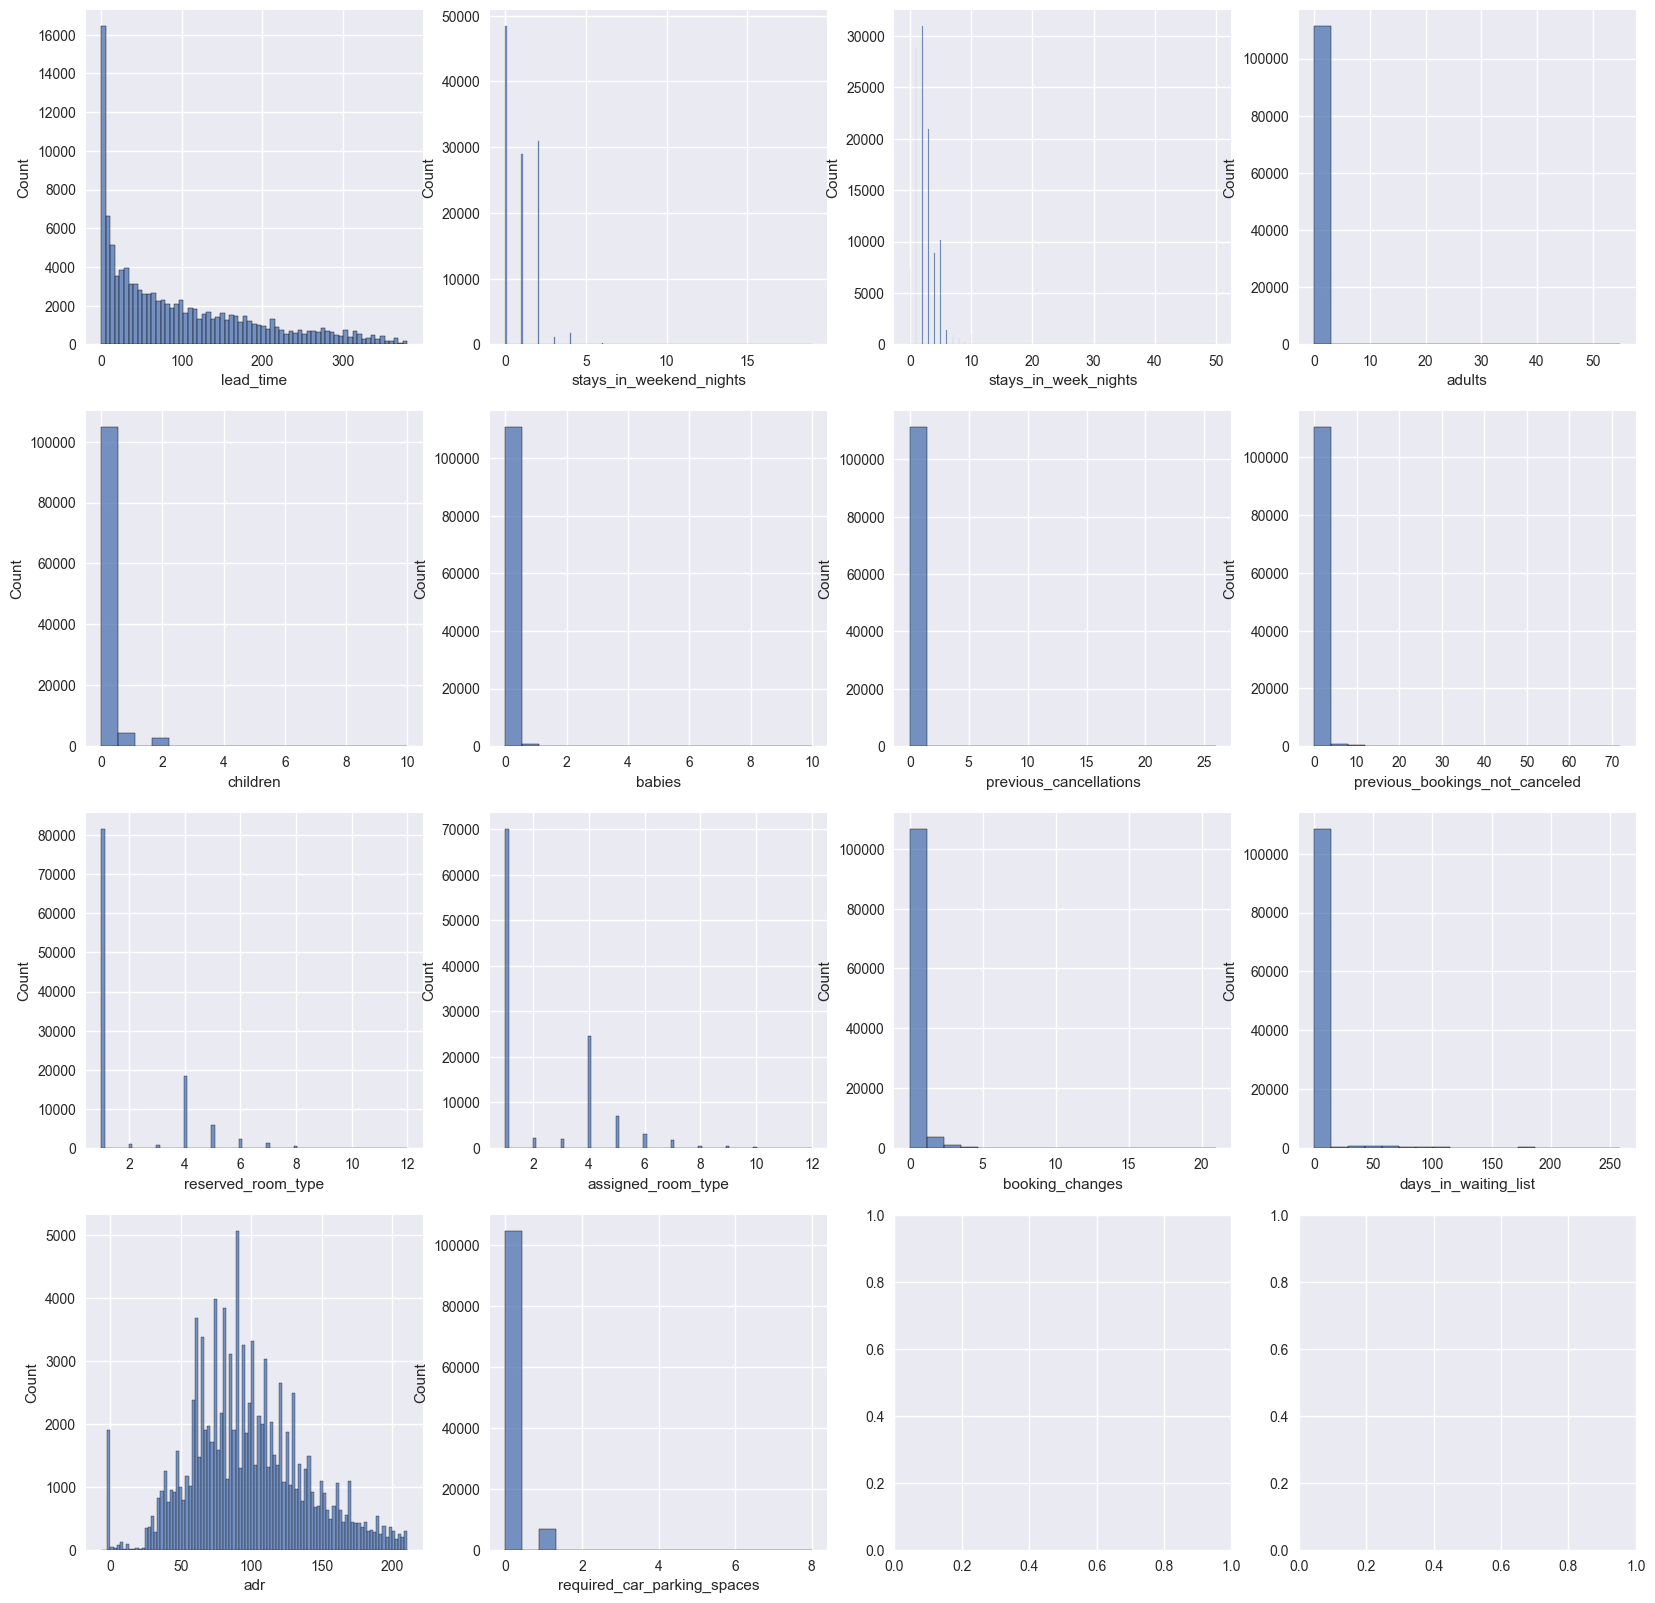

In [15]:
fig, ax = plt.subplots(figsize=(20,20), ncols=4, nrows=4)
textprops = {"fontsize":20}

sns.histplot(x = X['lead_time'],ax=ax[0,0])
sns.histplot(x = X['stays_in_weekend_nights'],ax=ax[0,1])
sns.histplot(x = X['stays_in_week_nights'],ax=ax[0,2])
sns.histplot(x = X['adults'],ax=ax[0,3])

sns.histplot(x = X['children'],ax=ax[1,0])
sns.histplot(x = X['babies'],ax=ax[1,1])
sns.histplot(x = X['previous_cancellations'],ax=ax[1,2])
sns.histplot(x = X['previous_bookings_not_canceled'],ax=ax[1,3])

sns.histplot(x = X['reserved_room_type'],ax=ax[2,0])
sns.histplot(x = X['assigned_room_type'],ax=ax[2,1])
sns.histplot(x = X['booking_changes'],ax=ax[2,2])
sns.histplot(x = X['days_in_waiting_list'],ax=ax[2,3])

sns.histplot(x = X['adr'],ax=ax[3,0])
sns.histplot(x = X['required_car_parking_spaces'],ax=ax[3,1]);

In [16]:
X

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,342,0,0,2,0,0,1,3,1,...,3,3,3,0,0,0,0.00,0,0,0
2,1,7,0,1,1,0,0,1,3,1,...,1,3,0,0,0,0,75.00,0,0,0
3,1,13,0,1,1,0,0,1,4,2,...,1,1,0,0,0,0,75.00,0,0,0
4,1,14,0,2,2,0,0,1,0,0,...,1,1,0,0,0,0,98.00,0,1,0
5,1,14,0,2,2,0,0,1,0,0,...,1,1,0,0,0,0,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118210,0,21,2,5,2,0,0,1,1,0,...,1,1,0,0,0,0,96.14,0,2,0
118211,0,23,2,5,2,0,0,1,1,0,...,1,1,0,0,0,0,96.14,0,0,0
118213,0,34,2,5,2,0,0,1,0,0,...,4,4,0,0,0,0,157.71,0,4,0
118214,0,109,2,5,2,0,0,1,0,0,...,1,1,0,0,0,0,104.40,0,0,0


# Lựa chọn các thuộc tính ảnh hưởng mạnh đến hủy phòng

In [18]:
X_corr = pd.concat([X,y], axis = 1)
X_corr = X_corr[X_corr['adr'] >= 0]

X = X_corr[['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'meal','market_segment', 'distribution_channel', 'is_repeated_guest', 
            'previous_cancellations', 'previous_bookings_not_canceled',
            'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
            'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]  # , 'reservation_status' , 'adr'
y = X_corr[['is_canceled']] 
selector = SelectKBest(chi2, k=15) 
selector.fit(X, y)
X_new = selector.transform(X) 

SelectKBest(k=15, score_func=<function chi2 at 0x000001D5C0A332E0>)

In [19]:
print(X.columns[selector.get_support(indices=True)])

Index(['hotel', 'lead_time', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [20]:
selector.get_support(indices=True)

array([ 0,  1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

# Chuẩn bị dữ liệu huấn luyện mô hình

In [22]:
sc = StandardScaler()
X_new = sc.fit_transform(X_new)

In [23]:
X_new

array([[ 1.44958152,  2.61291204,  1.51952472, ..., -0.52654298,
        -0.25204411, -0.7254402 ],
       [ 1.44958152, -0.95423819,  1.51952472, ..., -0.52654298,
        -0.25204411, -0.7254402 ],
       [ 1.44958152, -0.89034893,  2.30236056, ..., -0.52654298,
        -0.25204411, -0.7254402 ],
       ...,
       [-0.68985427, -0.66673653, -0.82898279, ..., -0.52654298,
        -0.25204411,  4.3329594 ],
       [-0.68985427,  0.13187919, -0.82898279, ..., -0.52654298,
        -0.25204411, -0.7254402 ],
       [-0.68985427,  1.15410732, -0.82898279, ..., -0.52654298,
        -0.25204411,  1.8037596 ]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, test_size = 0.3)
print(X_train.shape, y_train.shape)

(78124, 15) (78124, 1)


# Huấn luyện mô hình

## Machine learning

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

### Logistic

In [26]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier() 
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Vẽ tree
# from sklearn import tree
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(model_dt, 
#                    feature_names=['hotel', 'lead_time', 'market_segment', 'distribution_channel',
#        'is_repeated_guest', 'previous_cancellations',
#        'previous_bookings_not_canceled', 'assigned_room_type',
#        'booking_changes', 'deposit_type', 'days_in_waiting_list',
#        'customer_type', 'adr', 'required_car_parking_spaces',
#        'total_of_special_requests'],  
#                    class_names='is_canceled',
#                    filled=True)

### SVM

In [29]:
from sklearn.svm import SVC
model_svm = SVC() 
model_svm.fit(X_train, y_train)

SVC()

### Randomforest

In [30]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

### XGBoost

In [31]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=100) 
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Deep Learning

### ANN

In [32]:
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

def build_classifier():
    classifier = Sequential() 
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [33]:
model_ann = build_classifier()

In [34]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 128       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model_ann.fit(x=X_train, y=y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
7813/7813 [==============================] - 15s 2ms/step - loss: 0.4343 - accuracy: 0.7970 - val_loss: 0.4134 - val_accuracy: 0.8116
Epoch 2/10
7813/7813 [==============================] - 15s 2ms/step - loss: 0.4119 - accuracy: 0.8084 - val_loss: 0.4053 - val_accuracy: 0.8103
Epoch 3/10
7813/7813 [==============================] - 16s 2ms/step - loss: 0.4067 - accuracy: 0.8114 - val_loss: 0.4037 - val_accuracy: 0.8136
Epoch 4/10
7813/7813 [==============================] - 14s 2ms/step - loss: 0.4021 - accuracy: 0.8124 - val_loss: 0.3969 - val_accuracy: 0.8163
Epoch 5/10
7813/7813 [==============================] - 30s 4ms/step - loss: 0.3989 - accuracy: 0.8132 - val_loss: 0.3928 - val_accuracy: 0.8201
Epoch 6/10
7813/7813 [==============================] - 26s 3ms/step - loss: 0.3969 - accuracy: 0.8141 - val_loss: 0.3929 - val_accuracy: 0.8183
Epoch 7/10
7813/7813 [==============================] - 29s 4ms/step - loss: 0.3959 - accuracy: 0.8145 - val_loss: 0.3900 - val_ac

# Đánh giá mô hình

In [36]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

### Dự đoán

In [37]:
log_pred = model_log.predict(X_test)
dt_pred = model_dt.predict(X_test)
svm_pred = model_svm.predict(X_test)
rf_pred = model_rf.predict(X_test)
xgb_pred = model_xgb.predict(X_test)
ann_pred = model_ann.predict(X_test) > 0.5

1047/1047 [==============================] - 2s 2ms/step


## Machine learning

In [38]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, classification_report

### Logistic

In [39]:
print("macro:", f1_score(y_test, log_pred, average='macro')*100)
print("accuracy:", accuracy_score(y_test, log_pred)*100)

macro: 75.328387048282
accuracy: 79.43372558389582


In [40]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     21314
           1       0.84      0.53      0.65     12168

    accuracy                           0.79     33482
   macro avg       0.81      0.74      0.75     33482
weighted avg       0.80      0.79      0.78     33482



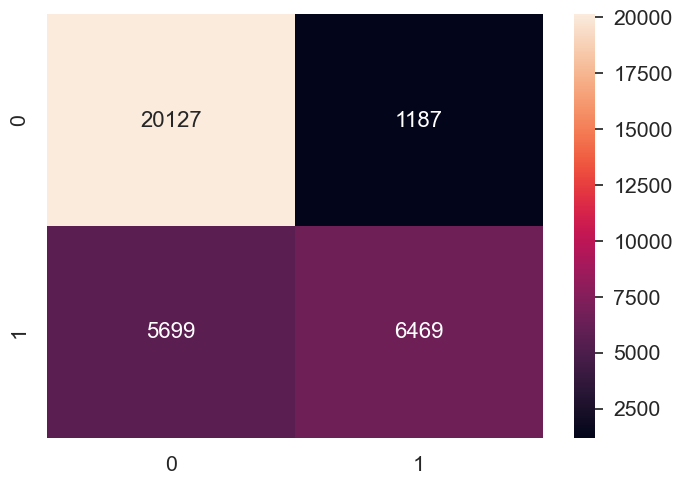

In [41]:
cf = confusion_matrix(y_test, log_pred)
df_cm = pd.DataFrame(cf, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

### Decision Tree

In [42]:
print("macro:", f1_score(y_test, dt_pred, average='macro')*100)
print("accuracy:", accuracy_score(y_test, dt_pred)*100)

macro: 80.03504423147922
accuracy: 81.84098918822053


In [43]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     21314
           1       0.77      0.71      0.74     12168

    accuracy                           0.82     33482
   macro avg       0.81      0.80      0.80     33482
weighted avg       0.82      0.82      0.82     33482



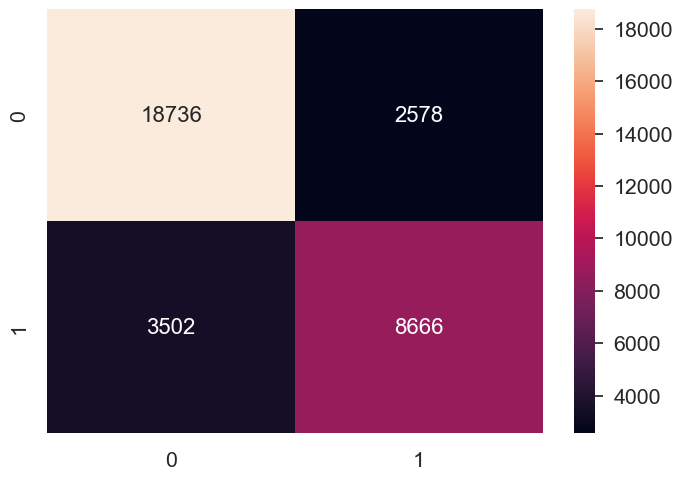

In [44]:
cf = confusion_matrix(y_test, dt_pred)
df_cm = pd.DataFrame(cf, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

### SVM

In [45]:
print("macro:", f1_score(y_test, svm_pred, average='macro')*100)
print("accuracy:", accuracy_score(y_test, svm_pred)*100)

macro: 78.62608163026763
accuracy: 81.31832029149992


In [46]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     21314
           1       0.81      0.63      0.71     12168

    accuracy                           0.81     33482
   macro avg       0.81      0.77      0.79     33482
weighted avg       0.81      0.81      0.81     33482



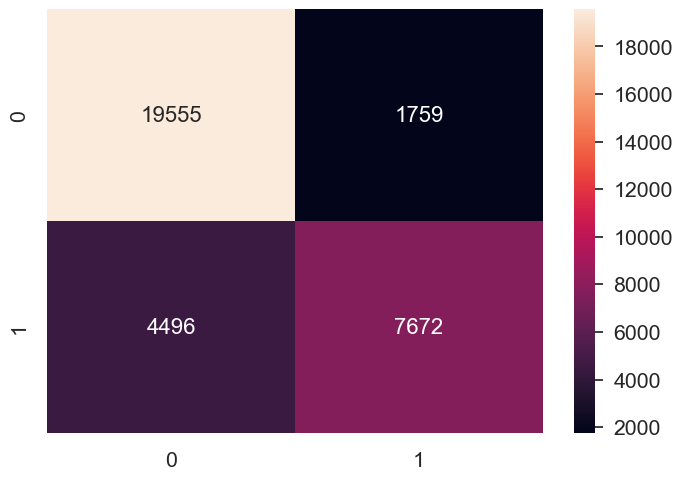

In [47]:
cf = confusion_matrix(y_test, svm_pred)
df_cm = pd.DataFrame(cf, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

### Randomforest

In [48]:
print("macro:", f1_score(y_test, rf_pred, average='macro')*100)
print("accuracy:", accuracy_score(y_test, rf_pred)*100)

macro: 80.75345452004376
accuracy: 82.44429842900664


In [49]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     21314
           1       0.78      0.73      0.75     12168

    accuracy                           0.82     33482
   macro avg       0.81      0.80      0.81     33482
weighted avg       0.82      0.82      0.82     33482



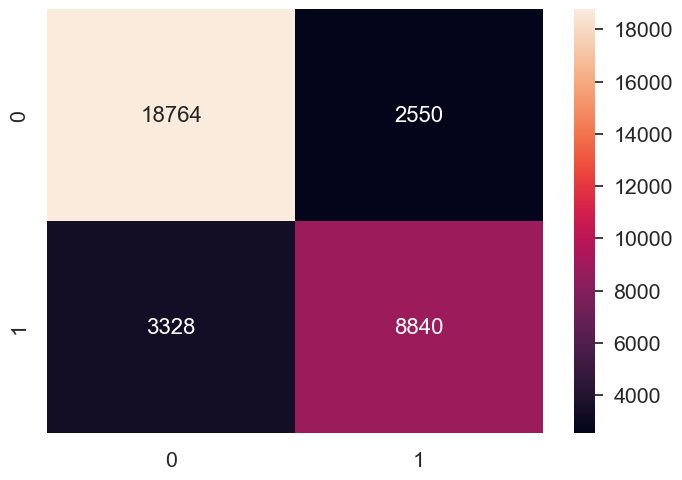

In [50]:
cf = confusion_matrix(y_test, rf_pred)
df_cm = pd.DataFrame(cf, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

### XGBoost

In [51]:
print("macro:", f1_score(y_test, xgb_pred, average='macro')*100)
print("accuracy:", accuracy_score(y_test, xgb_pred)*100)

macro: 80.9753962174037
accuracy: 83.26563526671048


In [52]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     21314
           1       0.84      0.67      0.74     12168

    accuracy                           0.83     33482
   macro avg       0.83      0.80      0.81     33482
weighted avg       0.83      0.83      0.83     33482



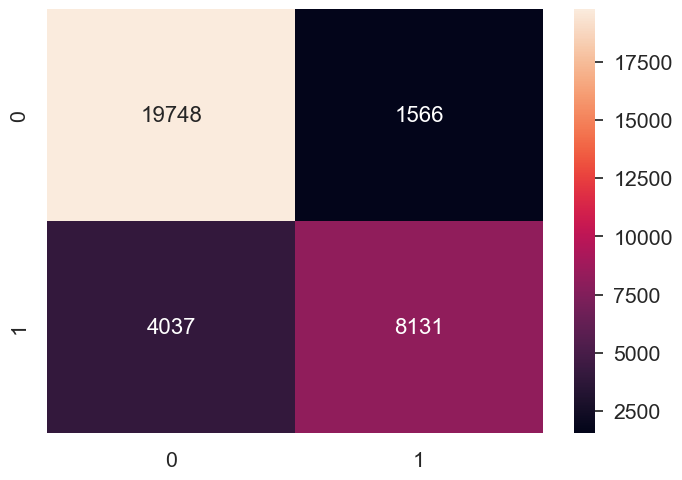

In [53]:
cf = confusion_matrix(y_test, xgb_pred)
df_cm = pd.DataFrame(cf, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

## Deep Learning

In [54]:
print("macro:", f1_score(y_test, ann_pred, average='macro')*100)
print("accuracy:", accuracy_score(y_test, ann_pred)*100)

macro: 79.38565215179558
accuracy: 82.0142165939908


In [55]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     21314
           1       0.83      0.64      0.72     12168

    accuracy                           0.82     33482
   macro avg       0.82      0.78      0.79     33482
weighted avg       0.82      0.82      0.81     33482



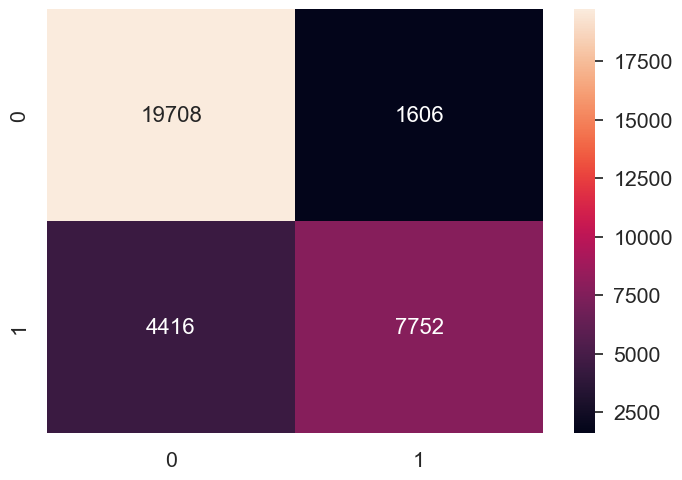

In [56]:
cf = confusion_matrix(y_test, ann_pred)
df_cm = pd.DataFrame(cf, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

# Mức độ quan trọng của các yếu tố ảnh hưởng tới việc đặt phòng

In [57]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

In [58]:
feature_names = ['hotel', 'lead_time', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests']

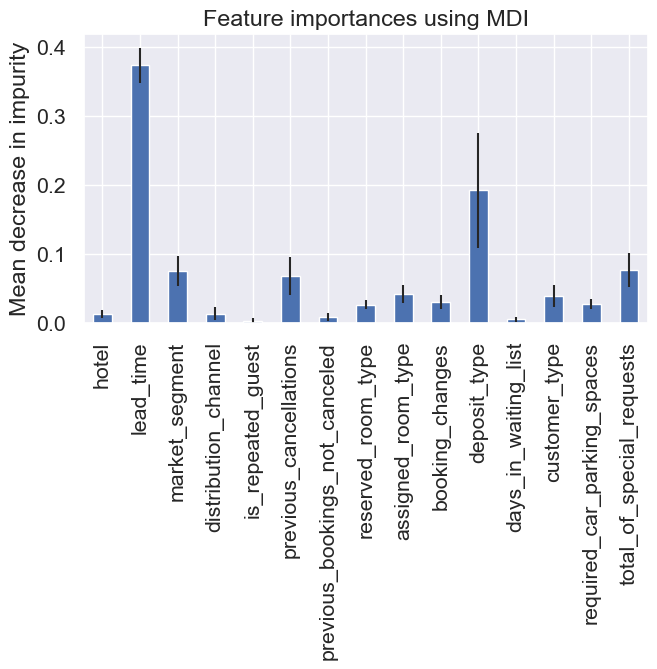

In [59]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(7,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Insight: **Thời gian chờ và loại thanh toán ảnh hưởng cao đến việc đặt phòng**

# Vẽ biểu đồ thể hiện sự ảnh hưởng của 2 yếu tố đến việc đặt phòng (0: Không hủy phòng, 1: Hủy phòng)

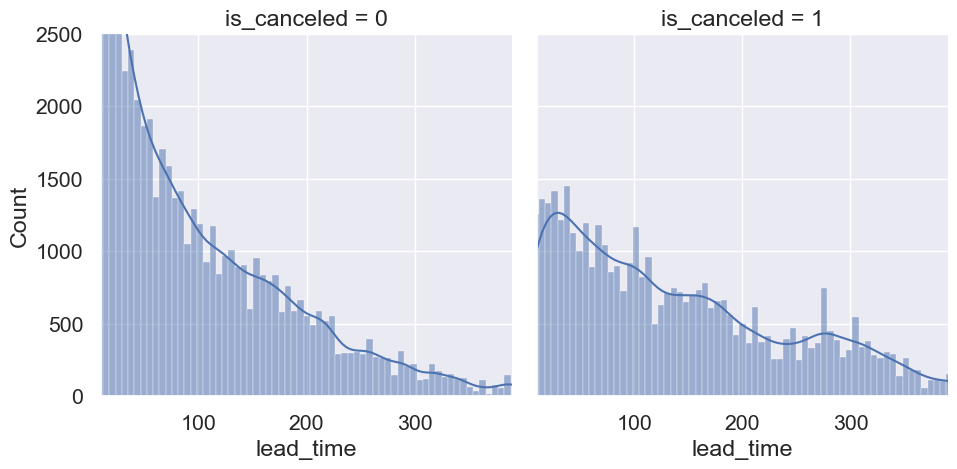

In [61]:
# lead_time
sns.displot(data=df, x="lead_time", col="is_canceled", kde=True)
plt.xlim(10, 390);
plt.ylim(0, 2500);

## **Nhận xét:** 
-   Từ 100 - 200: thời gian chờ càng ít thì ít hủy phòng
-   Từ 250 - 350: thời gian chờ lâu hơn thì dễ hủy phòng

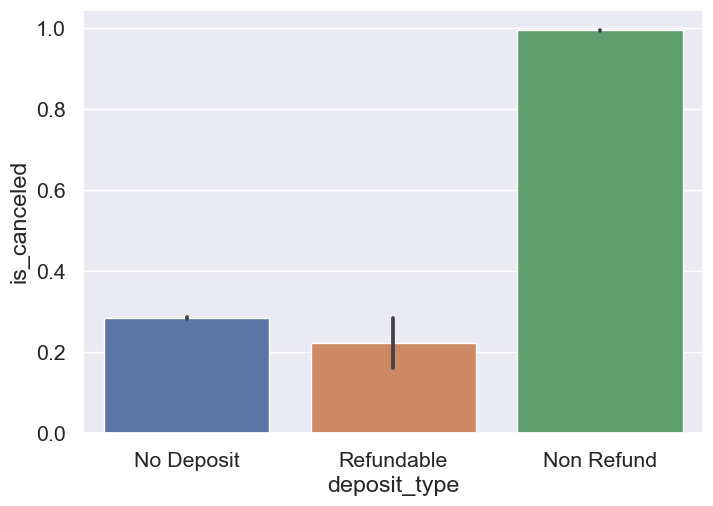

In [62]:
# deposit_type
sns.barplot(data=df, x="deposit_type", estimator=np.mean, y="is_canceled");

## **Nhận xét:** Không có tiền cọc trước, khách hàng dễ hủy phòng

# **Additionally Task:** Gom nhóm khách hàng

## Lựa chọn số nhóm khách hàng cần gom nhóm

In [154]:
df_cluster = df[['is_canceled','hotel', 'lead_time', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests']]

In [155]:
df_cluster.head()

,is_canceled,hotel,lead_time,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,Direct,Direct,0,0,0,3,3,3,No Deposit,0,Transient,0,0
1,0,Resort Hotel,737,Direct,Direct,0,0,0,3,3,4,No Deposit,0,Transient,0,0
2,0,Resort Hotel,7,Direct,Direct,0,0,0,1,3,0,No Deposit,0,Transient,0,0
3,0,Resort Hotel,13,Corporate,Corporate,0,0,0,1,1,0,No Deposit,0,Transient,0,0
4,0,Resort Hotel,14,Online TA,TA/TO,0,0,0,1,1,0,No Deposit,0,Transient,0,1


### Tiền xử lý cho biến rời rạc

In [156]:
for i in [df_cluster]:
  i['hotel'] = i['hotel'].map(hotel_type)

for i in [df_cluster]:
   i['market_segment'] = i['market_segment'].map(mar_type)

for i in [df_cluster]:
    i['distribution_channel'] = i['distribution_channel'].map(dis_type)

for i in [df_cluster]:
    i['deposit_type'] = i['deposit_type'].map(des_type)

for i in [df_cluster]:
    i['customer_type'] = i['customer_type'].map(cus_type)

In [157]:
df_cluster.head(3)

,is_canceled,hotel,lead_time,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,1,342,3,1,0,0,0,3,3,3,0,0,0,0,0
1,0,1,737,3,1,0,0,0,3,3,4,0,0,0,0,0
2,0,1,7,3,1,0,0,0,1,3,0,0,0,0,0,0


### Plot elbow

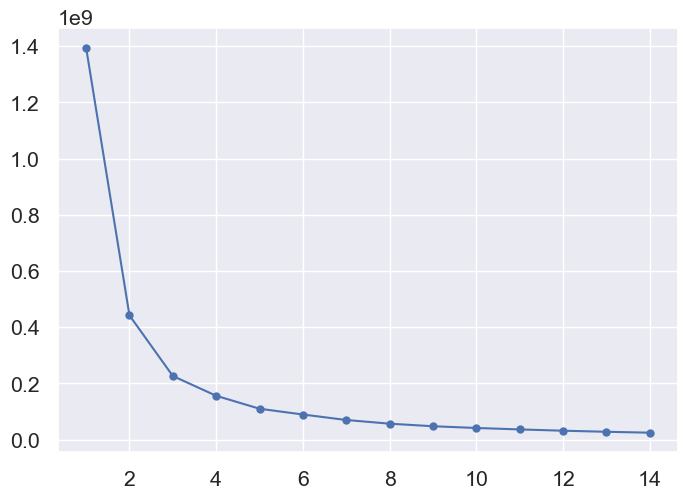

In [158]:
from sklearn.cluster import KMeans
distance = []
K = range (1,15)
for k in K : 
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df_cluster)
    distance.append(k_mean.inertia_)
plt.plot(K,distance,marker='o');

### **Nhận xét:** Chia thành 3 nhóm khách hàng

## Huấn luyện mô hình

In [159]:
k_mean_cus = KMeans(n_clusters=3)
k_mean_CustomerClus = k_mean_cus.fit(df_cluster)
k_mean_CustomerClus.labels_

array([2, 2, 1, ..., 1, 0, 0])

## Đặt trưng của 3 nhóm khách hàng

In [169]:
center = [k_mean_CustomerClus.cluster_centers_[:, 0].round(0), k_mean_CustomerClus.cluster_centers_[:, 1].round(0),
k_mean_CustomerClus.cluster_centers_[:, 2].round(0), k_mean_CustomerClus.cluster_centers_[:, 3].round(0),
k_mean_CustomerClus.cluster_centers_[:, 4].round(0), k_mean_CustomerClus.cluster_centers_[:, 5].round(0),
k_mean_CustomerClus.cluster_centers_[:, 6].round(0), k_mean_CustomerClus.cluster_centers_[:, 7].round(0),
k_mean_CustomerClus.cluster_centers_[:, 8].round(0), k_mean_CustomerClus.cluster_centers_[:, 9].round(0),
k_mean_CustomerClus.cluster_centers_[:, 10].round(0), k_mean_CustomerClus.cluster_centers_[:, 11].round(0),
k_mean_CustomerClus.cluster_centers_[:, 12].round(0), k_mean_CustomerClus.cluster_centers_[:, 13].round(0),
k_mean_CustomerClus.cluster_centers_[:, 14].round(0),k_mean_CustomerClus.cluster_centers_[:, 15].round(0)]
center = np.array(center)
center = center.astype(int)

hotel_type_idx2value = {0:'City Hotel', 1:'Resort Hotel'}
mar_type_idx2value = {0: 'Online TA', 1: 'Offline TA/TO', 2: 'Groups', 3:'Direct', 4:'Corporate', 5:'Complementary', 6:'Aviation'}
dis_type_idx2value = {0: 'TA/TO', 1: 'Direct', 2: 'Corporate', 3: 'GDS'}
des_type_idx2value = {0: 'No Deposit', 1: 'Non Refund', 2: 'Refundable'}
cus_type_idx2value = {0: 'Transient', 1: 'Transient-Party', 2: 'Contract', 3: 'Group'}
res_type_idx2value = {0: 'Check-Out', 1: 'Canceled', 2: 'No-Show'}

columns = df_cluster.columns
index = ['Cluster 1','Cluster 2','Cluster 3']

custom_features = pd.DataFrame(center.T,columns=columns,index=index)

custom_features['hotel'] = custom_features['hotel'].map(hotel_type_idx2value)
custom_features['market_segment'] = custom_features['market_segment'].map(mar_type_idx2value)
custom_features['distribution_channel'] = custom_features['distribution_channel'].map(dis_type_idx2value)
custom_features['deposit_type'] = custom_features['deposit_type'].map(des_type_idx2value)
custom_features['customer_type'] = custom_features['customer_type'].map(cus_type_idx2value)

In [162]:
df_cluster.head(5)

,is_canceled,hotel,lead_time,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,1,342,3,1,0,0,0,3,3,3,0,0,0,0,0
1,0,1,737,3,1,0,0,0,3,3,4,0,0,0,0,0
2,0,1,7,3,1,0,0,0,1,3,0,0,0,0,0,0
3,0,1,13,4,2,0,0,0,1,1,0,0,0,0,0,0
4,0,1,14,0,0,0,0,0,1,1,0,0,0,0,0,1


In [177]:
custom_features.iloc[:,:7]

,is_canceled,hotel,lead_time,market_segment,distribution_channel,is_repeated_guest,previous_cancellations
Cluster 1,0,City Hotel,152,Offline TA/TO,TA/TO,0,0
Cluster 2,0,City Hotel,31,Offline TA/TO,TA/TO,0,0
Cluster 3,1,City Hotel,323,Offline TA/TO,TA/TO,0,0


In [180]:
custom_features.iloc[:,7:13]

,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list
Cluster 1,0,2,2,0,No Deposit,3
Cluster 2,0,2,3,0,No Deposit,0
Cluster 3,0,1,2,0,No Deposit,9


In [181]:
custom_features.iloc[:,13:]

,customer_type,required_car_parking_spaces,total_of_special_requests
Cluster 1,Transient,0,1
Cluster 2,Transient,0,1
Cluster 3,Transient-Party,0,0


### **Nhận xét:**
- Nhóm 3 là nhóm có xu hướng dễ hủy phòng 
- Đặc trưng của nhóm 3:
  - Thời gian chờ từ ngày khách hàng đặt chỗ đến ngày khách hàng đến nhận phòng.cao hơn rất nhiều 2 nhóm còn lại (323 so với 152 và 31)
  - Thời gian chờ để được khách sạn xác nhận việc đặt phòng rất lâu (9 so với 3 và 0)
  - Là loại khách hàng tạm trú theo nhóm và không có ý định ở lâu dài (Transient-Party)


## Vẽ biểu đồ thể hiện sự ảnh hưởng của các nhóm đến việc đặt phòng (0: Không hủy phòng, 1: Hủy phòng)
- **Vẽ dựa trên 3 biến có sự khác biệt:** lead_time, days_in_waiting_list, customer_type

In [204]:
result = k_mean_CustomerClus.labels_
result

array([2, 2, 1, ..., 1, 0, 0])

In [205]:
df_cluster_np = np.array(df_cluster)
df_cluster_np

array([[  0,   1, 342, ...,   0,   0,   0],
       [  0,   1, 737, ...,   0,   0,   0],
       [  0,   1,   7, ...,   0,   0,   0],
       ...,
       [  0,   0,  34, ...,   0,   0,   4],
       [  0,   0, 109, ...,   0,   0,   0],
       [  0,   0, 205, ...,   0,   0,   2]], dtype=int64)

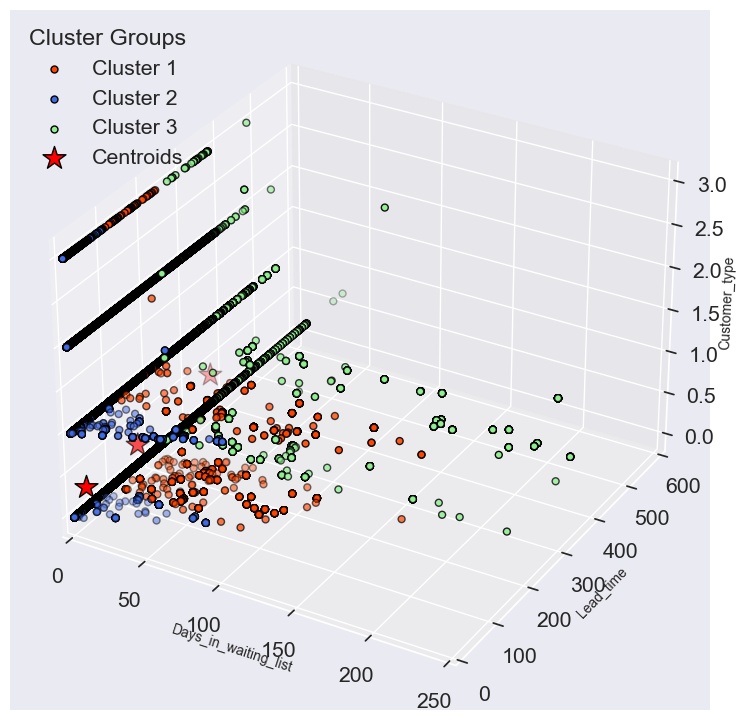

In [337]:
from mpl_toolkits import mplot3d

result = k_mean_CustomerClus.labels_
df_cluster_np = np.array(df_cluster)
fig = plt.figure(figsize=(7,7))
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter3D(
    df_cluster_np[result == 0,12], df_cluster_np[result == 0,2], df_cluster_np[result == 0,13],
    c='orangered',s=25,
    edgecolor='black',
    label='Cluster 1')
ax.scatter3D(
    df_cluster_np[result == 1,12], df_cluster_np[result == 1,2], df_cluster_np[result == 1,13],
    c='royalblue',s=25,
    edgecolor='black',
    label='Cluster 2')
ax.scatter3D(
    df_cluster_np[result == 2,12], df_cluster_np[result == 2,2], df_cluster_np[result == 2,13],
    c='lightgreen',s=25,
    edgecolor='black',
    label='Cluster 3')

ax.scatter3D(
    k_mean_CustomerClus.cluster_centers_[:, 12], k_mean_CustomerClus.cluster_centers_[:, 2], 
    k_mean_CustomerClus.cluster_centers_[:, 13],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='Centroids')

ax.set_xlabel('Days_in_waiting_list', fontsize = 10)
ax.set_ylabel('Lead_time', fontsize = 10)
ax.set_zlabel('Customer_type', fontsize =10)
ax.set_xlim(0, 250)
ax.set_ylim(0, 600)

plt.legend(scatterpoints=1, loc = 'upper left', title='Cluster Groups');

(0.0, 600.0)

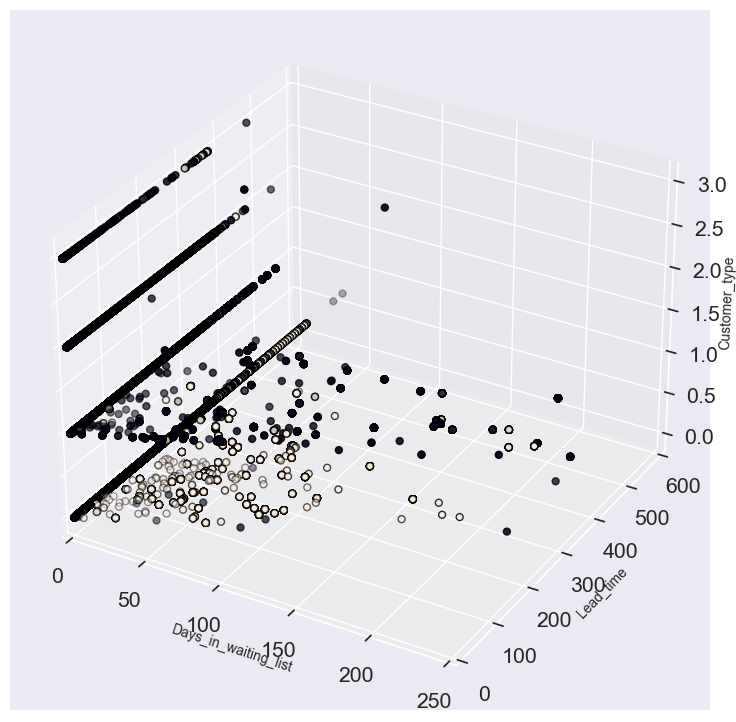

In [338]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(7,7))
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter3D(
    df_cluster_np[result == 0,12], df_cluster_np[result == 0,2], df_cluster_np[result == 0,13],
    c = df_cluster_np[result == 0,0], s=25,
    edgecolor='black',
)
ax.scatter3D(
    df_cluster_np[result == 1,12], df_cluster_np[result == 1,2], df_cluster_np[result == 1,13],
    c = df_cluster_np[result == 1,0], s=25,
    edgecolor='black',
)

ax.scatter3D(
    df_cluster_np[result == 2,12], df_cluster_np[result == 2,2], df_cluster_np[result == 2,13],
    c = df_cluster_np[result == 2,0], s=25,
    edgecolor='black',
)

ax.set_xlabel('Days_in_waiting_list', fontsize = 10)
ax.set_ylabel('Lead_time', fontsize = 10)
ax.set_zlabel('Customer_type', fontsize =10)
ax.set_xlim(0, 250)
ax.set_ylim(0, 600)

<Axes: >

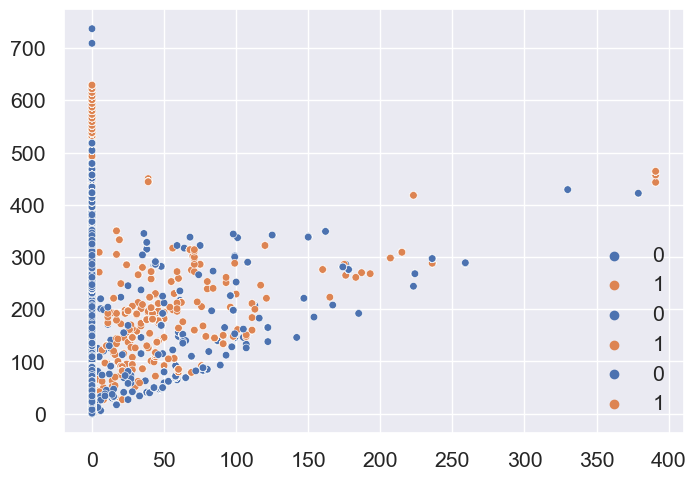

In [260]:
sns.scatterplot(x=df_cluster_np[result == 0,12], y=df_cluster_np[result == 0,2],s=30, hue=df_cluster_np[result == 0,0]) #, c='orangered'
sns.scatterplot(x=df_cluster_np[result == 1,12], y=df_cluster_np[result == 1,2],s=30, hue=df_cluster_np[result == 1,0]) #, c='royalblue'
sns.scatterplot(x=df_cluster_np[result == 2,12], y=df_cluster_np[result == 2,2],s=30, hue=df_cluster_np[result == 2,0]) #, c='lightgreen';

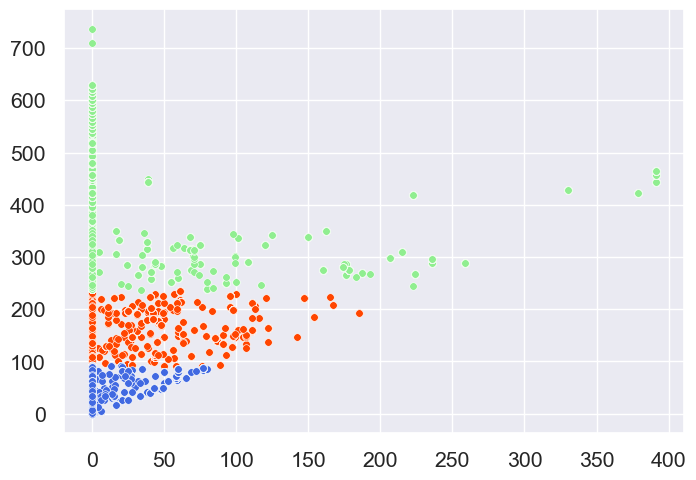

In [261]:
sns.scatterplot(x=df_cluster_np[result == 0,12], y=df_cluster_np[result == 0,2], c='orangered',s=30)
sns.scatterplot(x=df_cluster_np[result == 1,12], y=df_cluster_np[result == 1,2], c='royalblue',s=30)
sns.scatterplot(x=df_cluster_np[result == 2,12], y=df_cluster_np[result == 2,2], c='lightgreen',s=30);